apogee_id: Unique identifyer to find same object in different fiels
Average: N_Visits number of times we've seen it
VHelio_avg: Average velocity relative to our sun accross all measurments (km/s)
AllVis table: VHelio: Measurments (km/s)
    uncertianty VRelerr (km/s)
AvgTable:
    VScatter: RMS scatter from each individual measurment.  
    Compairs the uncertainty to the scatter. 
StableRV_xi2: xi^2 of the measurments around the mean value. 
StableRV_xi2_prob: P value of the xi^2 value with the number of DOF. 
JG: Julian Date, time that we saw it. 
1)
VScatter
StableRV_chi2_prob Histogram of the data,
2)
THen look at properties, color magnitude diagram. (CMD)
    H vs. J-K (average file Near IR) 
    make binary ones in different color fromt the rest to see patterns,
    Fe_h alpha_m (Iron/H ratio) alpha_m

h - (j/k) 

In [1]:
# Loading helpfull librarries
from astropy.io import fits
from astropy.table import Table

import numpy as np
import matplotlib.pyplot as plt

# Import the data and set it as two Tables, AllAverage just looks at the average measurments for each object
# AllVisit is the data from each individual pass at the object.
AllAverage = Table(fits.getdata(r'C:\Users\Cody Brown\Desktop\Binary Search\Data\allMC.avg.nocut.fits',1))
AllVisit = Table(fits.getdata(r'C:\Users\Cody Brown\Desktop\Binary Search\Data\allVisit-t9-l31c-58104.mc.fits',1))



In [2]:
AllAverage

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23]
str57,str36,str59,str38,str18,str6,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,str147,str14,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,str23,str14,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str17,float32,float32,int16,int16,float32,float32,str20,str1044,str917,int32,int32,float32,float32
apogee.apo25m.s.stars.SMC1.2M00034301-7717269,SMC1.2M00034301-7717269,apogee.apo25m.s.t9-l31c.SMC1.2M00034301-7717269,apStar-t9-2M00034301-7717269.fits,2M00034301-7717269,lco25m,5521,SMC1,11.12,0.024,10.853,0.024,10.844,0.023,0.929224,-77.290833,306.311976775,-39.5225249604,0,0,0,"APOGEE2_NO_DERED,APOGEE2_TELLURIC",apogee2s,0 .. 2,2,0,0,53.349,0,,0,,2.8306,0.0241356,0.0610708,0.0932148,2.8306,0.0241356,0.0610708,0.0932148,2.9713,0.1

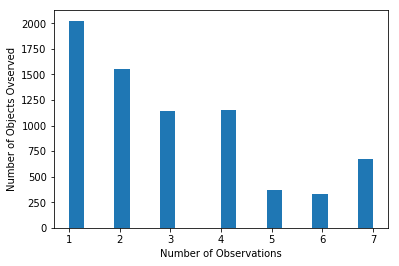

In [3]:
# Histogram of the objects and the number of objects that we've visited that number of times. 
plt.hist(AllAverage['NVISITS'],bins = 'auto',linestyle = 'dashed')
plt.xlabel('Number of Observations')
plt.ylabel('Number of Objects Ovserved')
plt.show()

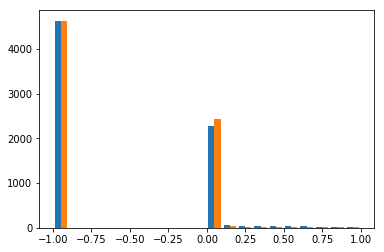

In [4]:
# Histogram of the data in STABLERV_CHI2_PROB
plt.hist(AllAverage['STABLERV_CHI2_PROB'],bins='auto')
plt.show()


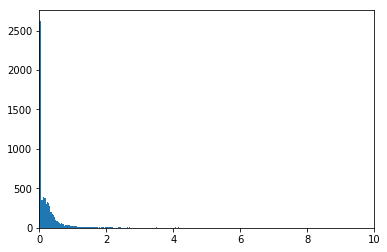

In [5]:
plt.xlim(0,10)
plt.hist(AllAverage['VSCATTER'],bins = 'auto')
plt.show()

In [6]:
# Now I want to make an array of APOGEE_ID, NVISITS, VSCATTER, STABLERV_CHI2, STABLERV_CHI2_PROB, VHELIO_AVG values,
AllAvgSimp = AllAverage['APOGEE_ID','NVISITS','VSCATTER','STABLERV_CHI2','STABLERV_CHI2_PROB','VHELIO_AVG']
AllAvgSimp

APOGEE_ID,NVISITS,VSCATTER,STABLERV_CHI2 [2],STABLERV_CHI2_PROB [2],VHELIO_AVG
str18,int32,float32,float32,float32,float32
2M00034301-7717269,2,0.0241356,-1.0 .. -1.0,-1.0 .. -1.0,2.8306
2M00034350-7705554,2,0.266057,-1.0 .. -1.0,-1.0 .. -1.0,14.2032
2M00034528-7700350,2,0.309402,-1.0 .. -1.0,-1.0 .. -1.0,-139.725
2M00041203-7706504,2,0.454263,-1.0 .. -1.0,-1.0 .. -1.0,6.19202
2M00045303-7725441,2,0.0280745,-1.0 .. -1.0,-1.0 .. -1.0,92.196
2M00050936-7738321,2,0.0658017,-1.0 .. -1.0,-1.0 .. -1.0,22.5277
2M00052792-7712055,2,0.0220836,-1.0 .. -1.0,-1.0 .. -1.0,-27.9822
2M00054678-7738202,2,0.37284,-1.0 .. -1.0,-1.0 .. -1.0,19.6062
2M00055448-7714368,5,0.0918901,19.3607 .. 66.179,0.000667512 .. 0.0,13.1601


In [7]:
# Now that I have a table with only the columns I want, I would like to get rid of any row that has less than 5 visits,
# First I'll make an array of the rows where NVISITS is less than 5
aRowsRemove = []
for n in range(len(AllAvgSimp)):
    if AllAvgSimp['NVISITS'][n] < 5:
        aRowsRemove.append(n)
aRowsRemove  # This is a list of all the rows I want to remove from AllAvgSimp


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 11,
 14,
 17,
 19,
 22,
 26,
 30,
 34,
 37,
 38,
 40,
 47,
 48,
 49,
 55,
 58,
 59,
 63,
 65,
 69,
 72,
 75,
 76,
 79,
 81,
 82,
 92,
 97,
 112,
 120,
 121,
 124,
 127,
 130,
 132,
 134,
 135,
 154,
 155,
 157,
 159,
 168,
 185,
 187,
 191,
 194,
 201,
 208,
 215,
 222,
 229,
 248,
 253,
 257,
 258,
 266,
 270,
 271,
 278,
 279,
 280,
 283,
 284,
 287,
 288,
 292,
 293,
 307,
 311,
 315,
 317,
 322,
 323,
 324,
 331,
 334,
 335,
 336,
 337,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 421,
 422,
 423,
 424,
 425,
 427,


In [8]:
AllAvgSimp.remove_rows(aRowsRemove)

In [9]:
AllAvgSimp

APOGEE_ID,NVISITS,VSCATTER,STABLERV_CHI2 [2],STABLERV_CHI2_PROB [2],VHELIO_AVG
str18,int32,float32,float32,float32,float32
2M00055448-7714368,5,0.0918901,19.3607 .. 66.179,0.000667512 .. 0.0,13.1601
2M00060328-7711352,7,0.199624,151.267 .. 151.267,0.0 .. 0.0,25.4596
2M00061700-7710022,7,0.793266,23.7855 .. 71.2917,2.77162e-05 .. 0.0,0.726452
2M00062965-7702113,6,0.418006,18.2146 .. 18.9726,0.000397205 .. 0.000276983,31.0779
2M00064564-7711354,6,1.51678,341.426 .. 162873.0,0.0 .. 0.0,-569.542
2M00073162-7736395,5,0.382218,80.2071 .. 110.7,0.0 .. 0.0,-2.34228
2M00073353-7729283,5,0.0634278,57.8044 .. 57.8044,0.0 .. 0.0,8.30935
2M00073970-7710053,5,0.204096,85.8723 .. 125.734,0.0 .. 0.0,30.3565
2M00074463-7721319,5,0.218982,57.2182 .. 57.2182,0.0 .. 0.0,12.2904


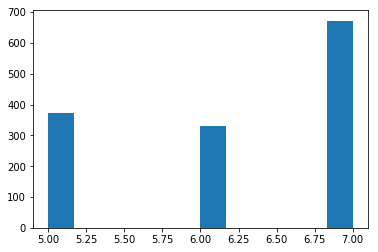

In [10]:
plt.hist(AllAvgSimp['NVISITS'],bins = 'auto')
plt.show()

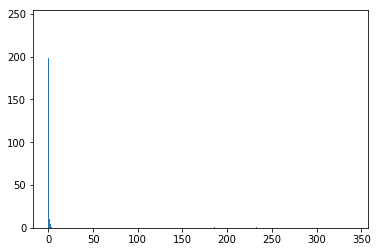

In [11]:
# Histogram of the data in STABLERV_CHI2_PROB
plt.hist(AllAvgSimp['VSCATTER'],bins= 'auto')
plt.show()

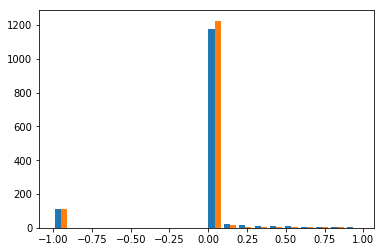

In [13]:
plt.hist(AllAvgSimp['STABLERV_CHI2_PROB'],bins = 20)
plt.show()

In [17]:
AllAvgSimp['STABLERV_CHI2_PROB'][0:10]

0.000667512 .. 0.0
0.0 .. 0.0
2.77162e-05 .. 0.0
0.000397205 .. 0.000276983
0.0 .. 0.0
0.0 .. 0.0
0.0 .. 0.0
0.0 .. 0.0
0.0 .. 0.0
0.732991 .. 0.732991
